In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('wind turbine life time.xlsx')
df.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,1977,1978,1979,1980,1981,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,10.0,13.0,18.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,454622.0,345912.5,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9
2,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,454622.0,345912.5,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9
3,90.0,18.0,23.0,1.427740e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,119928.0,97373.0,91831.0,93290.0,98739.0,37100.0,0.0,NaN,NaN,NaN
4,22.0,10.0,18.0,2.504650e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
start_date = np.zeros(df.shape[0])
end_date = np.zeros(df.shape[0])

for i in range(1977,2017):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if start_date[num] == 0:
            start_date[num] = i
            
for i in range(2016,1976,-1):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if end_date[num] == 0:
            end_date[num] = i
len(start_date),len(end_date)       

(3306, 3306)

In [4]:
df['Year of start'] = list(start_date)
df['Year of end'] = list(end_date)
df.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,Year of start,Year of end
0,10.0,13.0,18.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,91831.0,93290.0,98739.0,37100.0,0.0,NaN,NaN,NaN,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0,2002.0


In [5]:
# Get date of start and end to calculate life time
df_data = df[['Capacity (kW)','Rotor diameter (m)','Hub height (m)','total production','life time','Year of start','Year of end']]
df_data.head()    

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end
0,10.0,13.0,18.0,0.000000e+00,NaN,0.0,0.0
1,300.0,35.0,35.0,1.164174e+07,NaN,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,NaN,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,NaN,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,NaN,1986.0,2002.0


In [6]:
df_data['life time'] = df_data['Year of end']-df_data['Year of start']+1
df_data = df_data.dropna()
drop_list = []
for i in df_data.index:
    if min(list(df_data.loc[i])) < 1 :
        drop_list.append(i)
len(drop_list)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


402

In [7]:
df_data = df_data.drop(index=drop_list)
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end
1,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,15.0,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,17.0,1986.0,2002.0
5,75.0,17.0,23.0,2.095934e+06,17.0,1986.0,2002.0


In [8]:
load_factor = {}
year = [i for i in range(1985,2017)]
cp_percent = [23.29,27.01,23.98,27.29,27.55,29.31,26.35,26.88,28.15,29.23,27.47,24.34,25.50,28.39,25.01,27.34,23.64,25.24,22.46,25.81,
              25.49,23.37,28.01,26.53,24.09,22.61,27.10,26.33,24.44,25.83,29.16,23.86]
for y,cp in zip(year,cp_percent):
    load_factor[y]=cp
for i in range(1978,1985):
    load_factor[i] = np.mean(cp_percent)
len(load_factor)

39

In [9]:
production_cp = []
for index in df_data.index:
    start_y = int(df_data.loc[index][5])
    end_y = int(df_data.loc[index][6])
    capacity = df_data.loc[index][0]
    production = 0
    for y in range(start_y,end_y+1):
        production += capacity*8760*load_factor[y]/100
    production_cp.append(production)
len(production_cp)

2903

In [10]:
df_data['Production_cp'] = production_cp
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end,Production_cp
1,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07
2,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07
3,90.0,18.0,23.0,1.427740e+06,15.0,1998.0,2012.0,3.007115e+06
4,22.0,10.0,18.0,2.504650e+05,17.0,1986.0,2002.0,8.724049e+05
5,75.0,17.0,23.0,2.095934e+06,17.0,1986.0,2002.0,2.974108e+06


In [11]:
df_data.to_csv('production.csv')

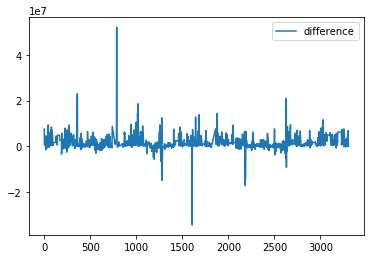

In [12]:
#plt.plot(df_data['total production'],label='from excel')
#plt.plot(df_data['Production_cp'],label='from cp')
plt.plot(df_data['Production_cp']-df_data['total production'],label='difference')
plt.legend()
plt.show()

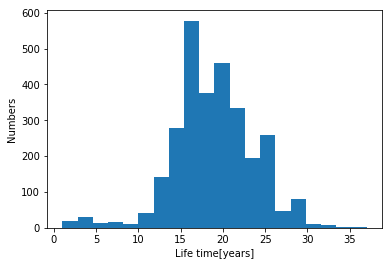

In [13]:
# a general plot to see the distribution of life time
life_time = list(df_data['life time'])

plt.hist(life_time,20)
plt.xlabel('Life time[years]')
plt.ylabel('Numbers')
plt.show()

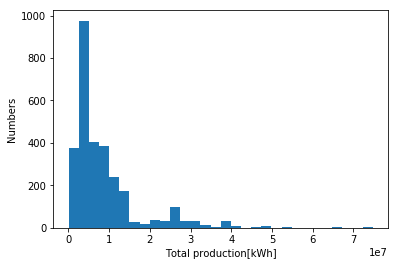

In [14]:
# a general plot to see the distribution of life time production
total_production = list(df_data['Production_cp'])

plt.hist(total_production,30)
plt.xlabel('Total production[kWh]')
plt.ylabel('Numbers')
plt.show()

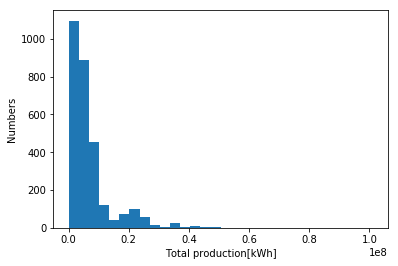

In [15]:
# a general plot to see the distribution of life time production
total_production = list(df_data['total production'])

plt.hist(total_production,30)
plt.xlabel('Total production[kWh]')
plt.ylabel('Numbers')
plt.show()

In [16]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [18]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

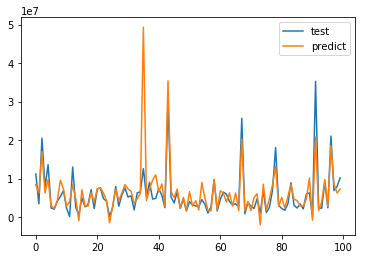

Text(0, 0.5, 'predict')

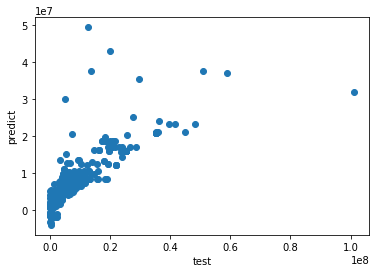

In [19]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [20]:
from sklearn import metrics
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

2457250.2730454155 24238768548096.78 4923288.387662943


In [21]:
regr.score(x_train, y_train),regr.score(x_test, y_test)

(0.6788238669523627, 0.6390933271223598)

In [22]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [23]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

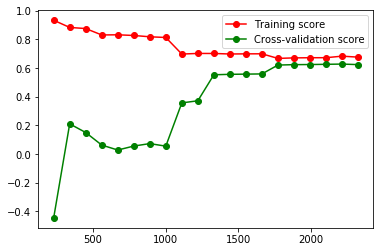

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [25]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

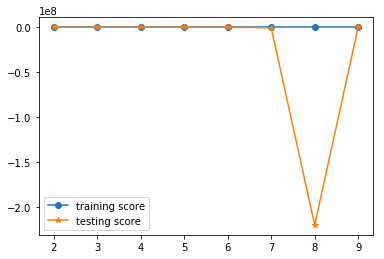

In [26]:
X = df_data.values.copy()
x_p = X[:,[0,1,2]]
y_p = X[:,[3]]
train_scores = []
test_scores = []
for i in range(2,10):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_p)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.plot(range(2,10),train_scores,'o-',label = 'training score')
plt.plot(range(2,10),test_scores,'*-',label = 'testing score')
plt.legend()
plt.show() 

In [27]:
train_scores,test_scores

([0.8027635219178941,
  0.8343314142790498,
  0.8881784462372658,
  0.7739429124960829,
  0.9117565314111172,
  0.3243614395132833,
  -0.8060175594430874,
  -10.368060661836065],
 [0.7543887111695249,
  -11.366239133086989,
  -1.748006172245403,
  -6.020107865973502,
  -3765.4705159112377,
  -578150.2645224418,
  -219622687.33442935,
  -16.924821095622537])

0.7817841425103517 0.8276838556022023


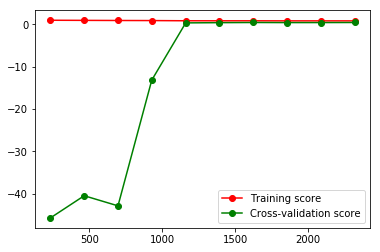

In [31]:
X = df_data.values.copy()
x_p = X[:,[0,1,2]]
y_p = X[:,[3]]
poly = PolynomialFeatures(2) # 3 and 4 will lead to overfitting, as the cross vildation scores are very bad
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_p)
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)
train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_p, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
print(regr.score(x_train,y_train),regr.score(x_test,y_test))
plt.show()

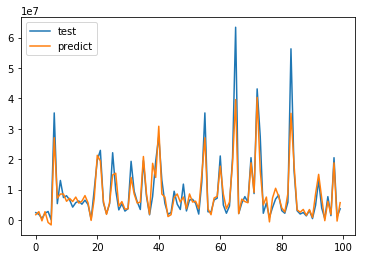

Text(0, 0.5, 'predict')

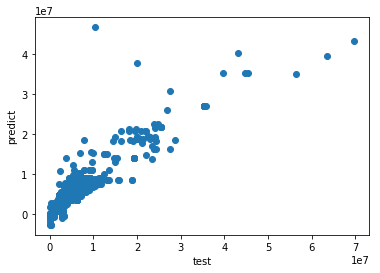

In [32]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [33]:
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

1840197.8230799949 10759571426355.303 3280178.566230092


In [34]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

#X = df_data.values.copy()
#y = X[:,3]
#x = X[:,[0,1,2]] # using all the features
#x_train, x_test, y_train, y_test = train_test_split(x,y)

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

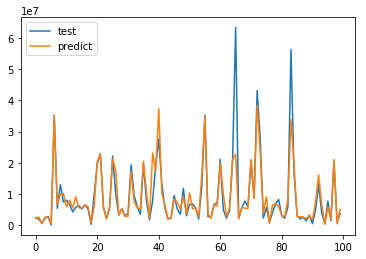

Text(0, 0.5, 'predict')

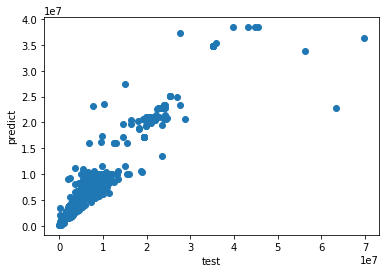

In [35]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [36]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.860055303474381, 0.8652749334548024)

In [37]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

1293464.5821357197 8412351503566.078 2900405.4033127986


In [38]:
x_in = [[3450,94,100]]
poly = PolynomialFeatures(2)
x_p = poly.fit_transform(x_in)
RF_model.predict(x_p)

array([28720029.14206395])

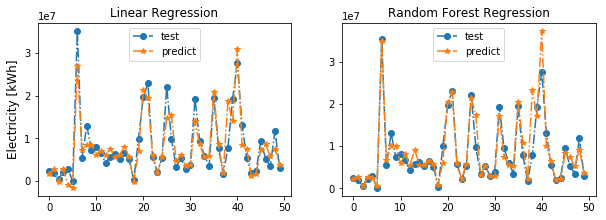

In [40]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Electricity [kWh]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.show()

In [36]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

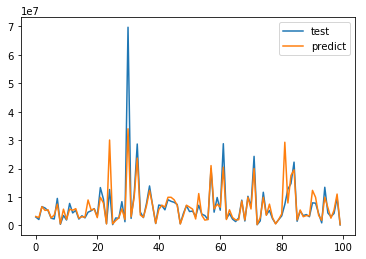

Text(0, 0.5, 'predict')

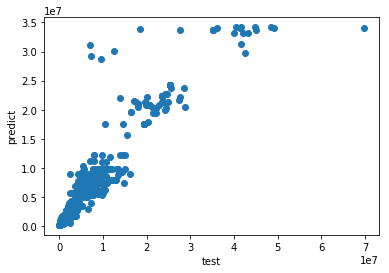

In [37]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [38]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

1461079.8898805554 8984595440751.81 2997431.473904251


In [39]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8307244446236781, 0.868256279059929)

In [40]:
actual_value = df_data['total production']
pred_RF = RF_model.predict(x)
pred_cp = df_data['Production_cp']
x_axis = [i for i in range(1,101)]

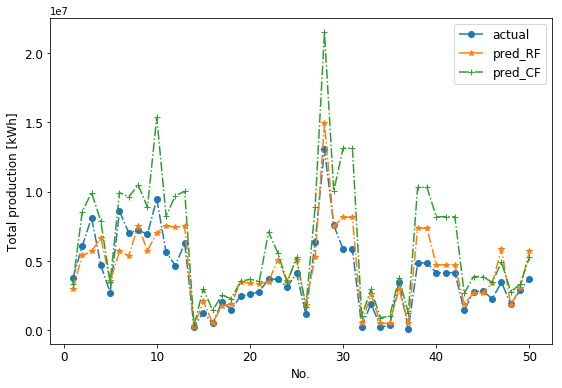

In [42]:
plt.figure(figsize=(9,6))
x_axis = [i for i in range(1,51)]
plt.plot(x_axis,actual_value[50:100],'-.o',label='actual')
plt.plot(x_axis,pred_RF[50:100],'-.*',label='pred_RF')
plt.plot(x_axis,pred_cp[50:100],'-.+',label='pred_CF')
plt.xlabel('No.',fontsize=12)
plt.ylabel('Total production [kWh]',fontsize=12)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('compaer_lf_cf_withoutlf.png')
plt.show()

In [37]:
MAE_CP=metrics.mean_absolute_error(actual_value,pred_cp) 
MSE_CP=metrics.mean_squared_error(actual_value,pred_cp)  
RMSE_CP= np.sqrt(metrics.mean_squared_error(actual_value,pred_cp))
print(MAE_CP,MSE_CP,RMSE_CP)

1901035.082816088 10742687860597.916 3277603.9816606757


In [38]:
actual_value.mean(),actual_value.max(),actual_value.min()

(6934353.356136422, 101164434.16100001, 101.0)

In [39]:
pred_RF.mean(),pred_RF.max(),pred_RF.min()

(6932823.404638851, 38322995.89199198, 195616.6396159847)

In [40]:
pred_cp.mean(),pred_cp.max(),pred_cp.min()

(8522015.030995771, 74811276.0, 20901.36)

In [41]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.01)

X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,4,5]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

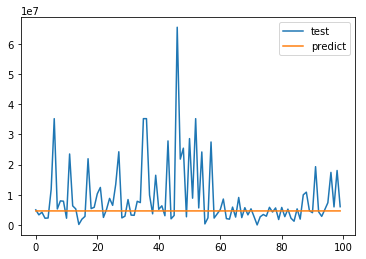

Text(0, 0.5, 'predict')

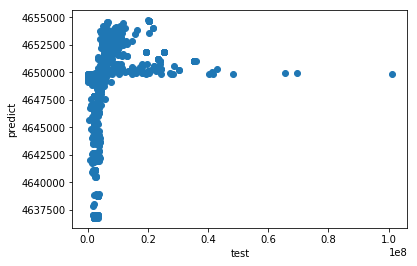

In [42]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [43]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

4800220.59377149 85911536731864.25 9268847.648541013


In [44]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(-0.08636317749383295, -0.09155642765210237)

In [45]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-4,
            'hidden_layer_sizes': (20,10), 
            'random_state':1,
            'max_iter':200,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,20)) # number of hidden layers
mlp.fit(x_train,y_train)
y_pred_NN = mlp.predict(x_test)

Iteration 1, loss = 49419367298650.95312500
Iteration 2, loss = 44183883756386.92187500
Iteration 3, loss = 27640816248121.52343750
Iteration 4, loss = 21350130425728.05468750
Iteration 5, loss = 17909644834250.83203125
Iteration 6, loss = 15534632798856.24023438
Iteration 7, loss = 14517201093578.64062500
Iteration 8, loss = 13676399771797.81640625
Iteration 9, loss = 13231968909668.87890625
Iteration 10, loss = 13246411045203.96875000
Iteration 11, loss = 13212668875853.17382812
Iteration 12, loss = 13213669637269.58398438
Iteration 13, loss = 13173933580611.07812500
Iteration 14, loss = 13109510367985.15429688
Iteration 15, loss = 13224106088615.41796875
Iteration 16, loss = 13352983934491.58007812
Iteration 17, loss = 13068893048248.05859375
Iteration 18, loss = 13117798011936.82226562
Iteration 19, loss = 13239731584781.07812500
Iteration 20, loss = 13108447385938.93359375
Iteration 21, loss = 13070603217342.29296875
Iteration 22, loss = 12963743900498.40234375
Iteration 23, loss 

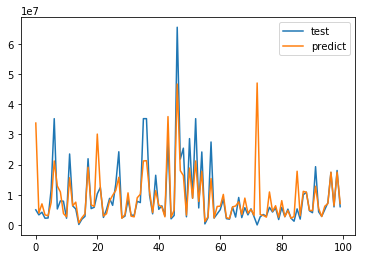

Text(0, 0.5, 'predict')

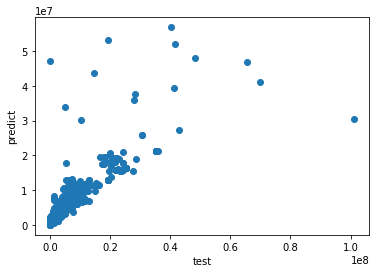

In [46]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [47]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

2166457.701704817 26063903267635.977 5105281.898939174


In [48]:
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

(0.7382780318894095, 0.668842832711912)

In [49]:
# feature extraction, adding new features

df_data['P_sqrt'] = df_data['Capacity (kW)']**0.5
df_data['P_log'] = np.log(list(df_data['Capacity (kW)']))
df_data['1/P'] = 1/df_data['Capacity (kW)']
df_data['R_sqrt'] = df_data['Rotor diameter (m)']**0.5
df_data['R_log'] = np.log(list(df_data['Rotor diameter (m)']))
df_data['1/R'] = 1/df_data['Rotor diameter (m)']
df_data['R_h'] = df_data['Rotor diameter (m)']/df_data['Hub height (m)']
df_data['exp(R/h)'] = np.exp(df_data['R_h'])
#df_data['P_square'] = df_data['Capacity (kW)']**2
df_data = df_data.dropna()
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end,Production_cp,P_sqrt,P_log,1/P,R_sqrt,R_log,1/R,R_h,exp(R/h)
1,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07,17.320508,5.703782,0.003333,5.916080,3.555348,0.028571,1.000000,2.718282
2,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07,17.320508,5.703782,0.003333,5.916080,3.555348,0.028571,1.000000,2.718282
3,90.0,18.0,23.0,1.427740e+06,15.0,1998.0,2012.0,3.007115e+06,9.486833,4.499810,0.011111,4.242641,2.890372,0.055556,0.782609,2.187170
4,22.0,10.0,18.0,2.504650e+05,17.0,1986.0,2002.0,8.724049e+05,4.690416,3.091042,0.045455,3.162278,2.302585,0.100000,0.555556,1.742909
5,75.0,17.0,23.0,2.095934e+06,17.0,1986.0,2002.0,2.974108e+06,8.660254,4.317488,0.013333,4.123106,2.833213,0.058824,0.739130,2.094114


In [50]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,8,9,10,11,12,13,14,15]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.09794464 0.05180716 0.05852303 0.12075463 0.21961155 0.07979604
 0.1202421  0.151039   0.02256067 0.02161468 0.05610651]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,1)# using 1 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [11  6 10  9  4  3  5  2  1  7  8]


In [52]:
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,8,12,13]] # selecting the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

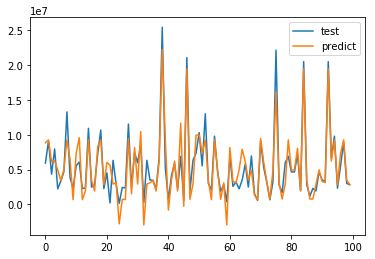

Text(0, 0.5, 'predict')

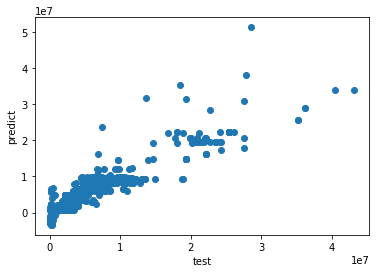

In [53]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [54]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

1811627.4018295277 7711134620438.737 2776892.9796516714


In [55]:
regr.score(x_train,y_train),regr.score(x_test,y_test)

(0.7663993949097083, 0.8167104864049778)

In [56]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

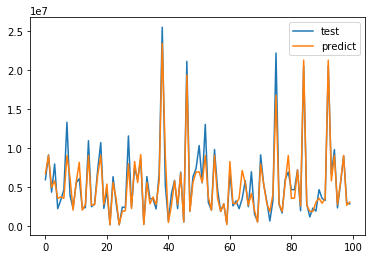

Text(0, 0.5, 'predict')

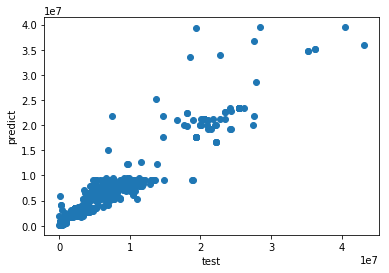

In [57]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [58]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

1221978.431751819 4553584501429.305 2133912.955448114


In [59]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8360328061635942, 0.8917637508015231)

In [60]:
RF_model.predict([[3450,105,np.log(3450),np.log(113),1/113]])

array([22780319.36360874])

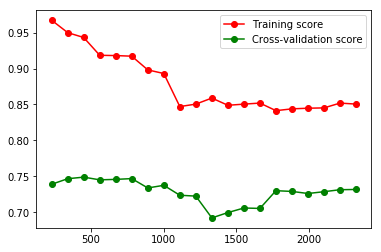

In [61]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [62]:
train_scores_mean

array([0.96736961, 0.95010354, 0.94333196, 0.91854952, 0.91814307,
       0.91731474, 0.89821449, 0.89315231, 0.8471121 , 0.850535  ,
       0.85898447, 0.84890117, 0.85050787, 0.85199563, 0.84143399,
       0.84392207, 0.84482677, 0.84526702, 0.85196117, 0.85056796])

In [63]:
test_scores_mean

array([0.73889038, 0.74661136, 0.74881288, 0.74504742, 0.74569425,
       0.74677065, 0.73374614, 0.73741896, 0.72360081, 0.72237756,
       0.6920094 , 0.69945743, 0.70580827, 0.70522778, 0.72993111,
       0.72891518, 0.72601042, 0.72852643, 0.73128784, 0.73165252])

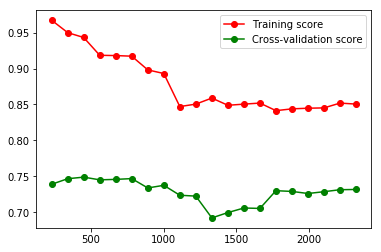

In [64]:
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

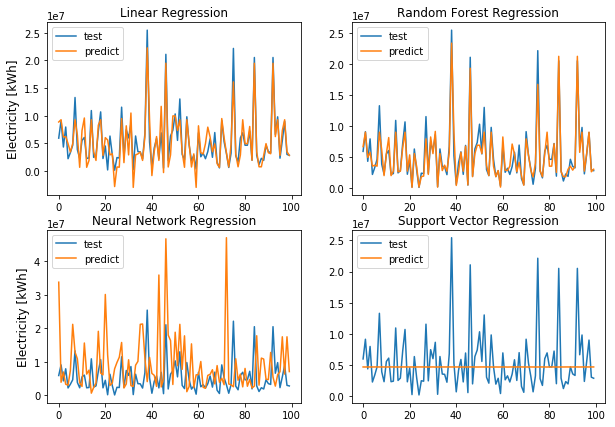

In [65]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.ylabel('Electricity [kWh]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.subplot(223)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.ylabel('Electricity [kWh]',fontsize=12)
plt.legend()
plt.title('Neural Network Regression')

plt.subplot(224)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.title('Support Vector Regression')

plt.show()